In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Dense,Activation,BatchNormalization,Input
from keras.preprocessing.image import img_to_array,load_img
import keras.backend as K

In [15]:
train = pd.read_csv('DirtyDocumentsDenoising/train_noised.csv')

In [16]:
print(train.head())

   Unnamed: 0  label
0           0  1.png
1           1  2.png
2           2  3.png
3           3  4.png
4           4  5.png


In [21]:
arr = []
for i in range(1,145,1):
    s = "DirtyDocumentsDenoising/train_noised/" + str(i) + ".png"
    arr.append(s)
train['noisy'] = arr

arr1 = []
for i in range(1,145,1):
    s = "DirtyDocumentsDenoising/train_cleaned/" + str(i) + ".png"
    arr1.append(s)
train['cleaned'] = arr1

In [22]:
print(train.head())

   Unnamed: 0  label                                       noisy  \
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png   
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png   
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png   
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png   
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png   

                                       cleaned  
0  DirtyDocumentsDenoising/train_cleaned/1.png  
1  DirtyDocumentsDenoising/train_cleaned/2.png  
2  DirtyDocumentsDenoising/train_cleaned/3.png  
3  DirtyDocumentsDenoising/train_cleaned/4.png  
4  DirtyDocumentsDenoising/train_cleaned/5.png  


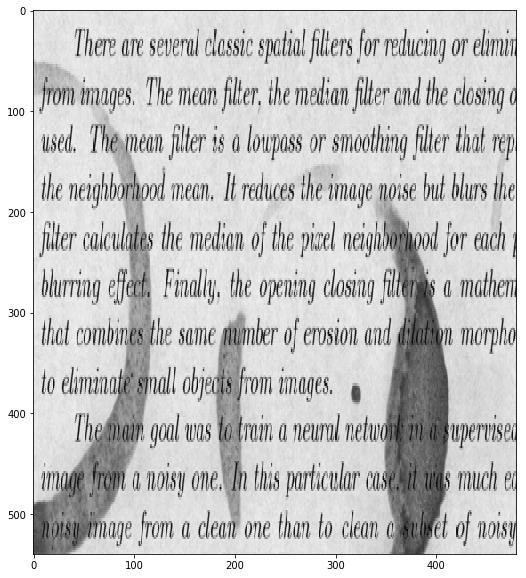

In [25]:
img = load_img(train['noisy'][1],target_size=(540,480))
fig = plt.figure(figsize=(10,10))
plt.imshow(img)

In [26]:
def load_imgg(path):
    ret_arr = []
    for i in path:
        img = load_img(i,target_size=(320,320,3))
        img = img_to_array(img)
        img = img.astype('float32') / 255.
        ret_arr.append(img)
    return ret_arr

In [31]:
train_noised = np.array(load_imgg(train['noisy']))
print(train_noised.shape)

train_cleaned = np.array(load_imgg(train['cleaned']))
print(train_cleaned.shape)

(144, 320, 320, 3)
(144, 320, 320, 3)


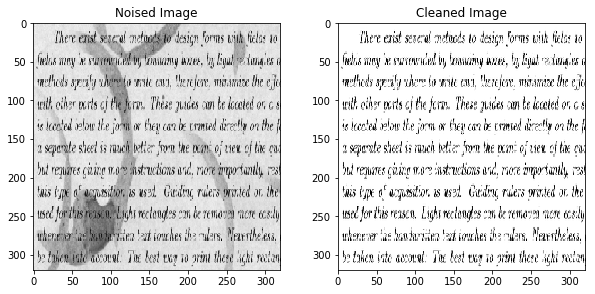

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Noised Image")
plt.imshow(train_noised[0])

plt.subplot(2,2,2)
plt.title("Cleaned Image")
plt.imshow(train_cleaned[0])

In [37]:
def patch_maker(arr):
    patch1 = []
    patch2 = []
    patch3 = []
    patch4 = []
    
    for i in arr:
        patch1.append(i[0:160,0:160,:])
        patch2.append(i[160:320,0:160,:])
        patch3.append(i[:160,0:160,:])
        patch4.append(i[160:,160:,:])
    return (patch1,patch2,patch3,patch4)

In [50]:
(patch_noised1,patch_noised2,patch_noised3,patch_noised4) = patch_maker(train_noised)
patch_noised1 = np.array(patch_noised1)
patch_noised2 = np.array(patch_noised2)
patch_noised3 = np.array(patch_noised3)
patch_noised4 = np.array(patch_noised4)

In [51]:
print(patch1.shape)
print(patch2.shape)
print(patch3.shape)
print(patch4.shape)

(144, 160, 160, 3)
(144, 160, 160, 3)
(144, 160, 160, 3)
(144, 160, 160, 3)


In [52]:
(patch_cleaned1,patch_cleaned2,patch_cleaned3,patch_cleaned4) = patch_maker(train_cleaned)

In [53]:
patch_cleaned1 = np.array(patch_cleaned1)
patch_cleaned2 = np.array(patch_cleaned2)
patch_cleaned3 = np.array(patch_cleaned3)
patch_cleaned4 = np.array(patch_cleaned4)
print(patch_cleaned1.shape)
print(patch_cleaned2.shape)
print(patch_cleaned3.shape)
print(patch_cleaned4.shape)

(144, 160, 160, 3)
(144, 160, 160, 3)
(144, 160, 160, 3)
(144, 160, 160, 3)


In [54]:
img = Input(shape=(160,160,3))

encoder = Conv2D(32,(3,3),activation='relu',padding='same')(img)
encoder = MaxPooling2D((2,2))(encoder)

encoder = Conv2D(16,(3,3),activation='relu',padding='same')(encoder)
encoder = MaxPooling2D((2,2))(encoder)

encoder = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
encoder = MaxPooling2D((2,2))(encoder)

decoder = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
decoder = UpSampling2D((2,2))(decoder)

decoder = Conv2D(16,(3,3),activation='relu',padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoder = Conv2D(32,(3,3),activation='relu',padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded_img = Conv2D(3,(3,3),activation='sigmoid',padding='same')(decoder)

In [48]:
autoencoder = Model(img,decoded_img)

In [79]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder.fit(patch_noised1,patch_cleaned1,epochs=200,batch_size=16)

Epoch 1/200
144/144 [==============================] - 18s 124ms/step - loss: 0.2676
Epoch 2/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2466
Epoch 3/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2412
Epoch 4/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2384
Epoch 5/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2364
Epoch 6/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2351
Epoch 7/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2343
Epoch 8/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2337
Epoch 9/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2334
Epoch 10/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2332
Epoch 11/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2330
Epoch 12/200
144/144 [==============================] - 17s 121

144/144 [==============================] - 18s 122ms/step - loss: 0.2220
Epoch 97/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2218
Epoch 98/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2215
Epoch 99/200
144/144 [==============================] - 18s 123ms/step - loss: 0.2217
Epoch 100/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2219
Epoch 101/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2217
Epoch 102/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2214
Epoch 103/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2210
Epoch 104/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2209
Epoch 105/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2207
Epoch 106/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2206
Epoch 107/200
144/144 [==============================] - 17s

144/144 [==============================] - 18s 124ms/step - loss: 0.2134
Epoch 191/200
144/144 [==============================] - 23s 158ms/step - loss: 0.2133
Epoch 192/200
144/144 [==============================] - 21s 149ms/step - loss: 0.2132
Epoch 193/200
144/144 [==============================] - 20s 140ms/step - loss: 0.2132
Epoch 194/200
144/144 [==============================] - 20s 138ms/step - loss: 0.2131
Epoch 195/200
144/144 [==============================] - 21s 145ms/step - loss: 0.2130
Epoch 196/200
144/144 [==============================] - 21s 147ms/step - loss: 0.2130
Epoch 197/200
144/144 [==============================] - 24s 165ms/step - loss: 0.2128
Epoch 198/200
144/144 [==============================] - 24s 168ms/step - loss: 0.2129
Epoch 199/200
144/144 [==============================] - 21s 146ms/step - loss: 0.2127
Epoch 200/200
144/144 [==============================] - 24s 167ms/step - loss: 0.2126


In [77]:
autoencoder1 = Model(img,decoded_img)
autoencoder2 = Model(img,decoded_img)
autoencoder3 = Model(img,decoded_img)


In [78]:

autoencoder1.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder1.fit(patch_noised2,patch_cleaned2,epochs=200,batch_size=16)

autoencoder2.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder2.fit(patch_noised3,patch_cleaned3,epochs=200,batch_size=16)

autoencoder3.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder3.fit(patch_noised4,patch_cleaned4,epochs=200,batch_size=16)


Epoch 1/200
144/144 [==============================] - 19s 134ms/step - loss: 0.2582
Epoch 2/200
144/144 [==============================] - 19s 134ms/step - loss: 0.2423
Epoch 3/200
144/144 [==============================] - 22s 154ms/step - loss: 0.2338
Epoch 4/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2296
Epoch 5/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2280
Epoch 6/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2270
Epoch 7/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2263
Epoch 8/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2259
Epoch 9/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2256
Epoch 10/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2254
Epoch 11/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2252
Epoch 12/200
144/144 [==============================] - 17s 121

144/144 [==============================] - 18s 122ms/step - loss: 0.2154
Epoch 97/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2155
Epoch 98/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2152
Epoch 99/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2150
Epoch 100/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2151
Epoch 101/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2149
Epoch 102/200
144/144 [==============================] - 18s 122ms/step - loss: 0.2146
Epoch 103/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2147
Epoch 104/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2148
Epoch 105/200
144/144 [==============================] - 17s 121ms/step - loss: 0.2146
Epoch 106/200
144/144 [==============================] - 18s 123ms/step - loss: 0.2143
Epoch 107/200
144/144 [==============================] - 18s

144/144 [==============================] - 17s 120ms/step - loss: 0.2054
Epoch 191/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2053
Epoch 192/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2050
Epoch 193/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2048
Epoch 194/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2046
Epoch 195/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2048
Epoch 196/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2045
Epoch 197/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2044
Epoch 198/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2047
Epoch 199/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2042
Epoch 200/200
144/144 [==============================] - 17s 120ms/step - loss: 0.2040
Epoch 1/200
144/144 [==============================] - 18

144/144 [==============================] - 17s 121ms/step - loss: 0.1975
Epoch 86/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1974
Epoch 87/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1973
Epoch 88/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1972
Epoch 89/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1971
Epoch 90/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1969
Epoch 91/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1969
Epoch 92/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1969
Epoch 93/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1969
Epoch 94/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1969
Epoch 95/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1965
Epoch 96/200
144/144 [==============================] - 17s 121ms/s

144/144 [==============================] - 17s 121ms/step - loss: 0.1907
Epoch 180/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1907
Epoch 181/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1909
Epoch 182/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1906
Epoch 183/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1904
Epoch 184/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1906
Epoch 185/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1904
Epoch 186/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1901
Epoch 187/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1902
Epoch 188/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1902
Epoch 189/200
144/144 [==============================] - 18s 126ms/step - loss: 0.1902
Epoch 190/200
144/144 [==============================] - 

144/144 [==============================] - 18s 123ms/step - loss: 0.1919
Epoch 75/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1919
Epoch 76/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1919
Epoch 77/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1919
Epoch 78/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1916
Epoch 79/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1917
Epoch 80/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1918
Epoch 81/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1914
Epoch 82/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1912
Epoch 83/200
144/144 [==============================] - 18s 123ms/step - loss: 0.1914
Epoch 84/200
144/144 [==============================] - 18s 122ms/step - loss: 0.1912
Epoch 85/200
144/144 [==============================] - 18s 122ms/s

144/144 [==============================] - 18s 122ms/step - loss: 0.1865
Epoch 169/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1864
Epoch 170/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1865
Epoch 171/200
144/144 [==============================] - 17s 120ms/step - loss: 0.1868
Epoch 172/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1867
Epoch 173/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1864
Epoch 174/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1864
Epoch 175/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1866
Epoch 176/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1864
Epoch 177/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1863
Epoch 178/200
144/144 [==============================] - 17s 121ms/step - loss: 0.1865
Epoch 179/200
144/144 [==============================] - 

In [73]:
def plot_pairwise(img1,img2):
    img1 = img1.reshape(160,160,3)
    img2 = img2.reshape(160,160,3)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("Img1")
    plt.imshow(img1)
    
    plt.subplot(2,2,2)
    plt.title("Img2")
    plt.imshow(img2)

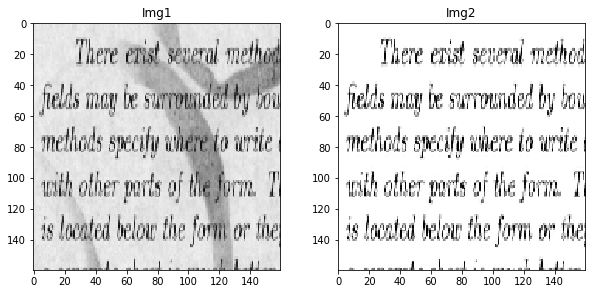

In [74]:
plot_pairwise(patch_noised1[0],patch_cleaned1[0])

In [75]:
pred = autoencoder.predict(patch_noised1)

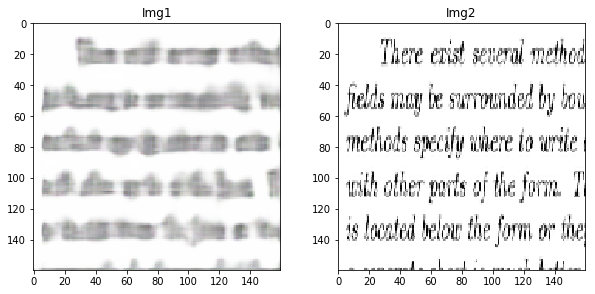

In [76]:
plot_pairwise(pred[0],patch_cleaned1[0])